# Geodesic Distances

In this notebook, we compute the SRVF geodesic distance between pairs of functions (e.g. contours) using the [fdasrsf](https://fdasrsf-python.readthedocs.io/en/latest/) library.

#### Imports

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
from geodesicDistances import geodDistance
import tqdm

### Data
We assume that the data is in a CSV with a column name called "Filename", and the X, Y coordinates in columns called "X", and "Y" respectively.

In [3]:
pth = "C:\\Users\\arian\\Documents\\GitHub\\Birds\\topContours_filtered.csv"
df = pd.read_csv(pth)
names = np.unique(list(df['Filename']))
n = len(names)
print(str(n)+" contours in dataset.")

680 contours in dataset.


### Pairwise Distances

We compute the pairwise distances with a for-loop so that the ouput is an nxn array. Note that since d(a,b) = d(b,a), we only compute one of the distances, in order to save time. Furthermore, we don't compute the distance between a contour and itself.

In [ ]:
distances = np.zeros((n,n))
errors = []

for i in tqdm.tqdm(range(0,n)):
    x1 = list(df[df['Filename']==names[i]]['X'])
    y1 = list(df[df['Filename']==names[i]]['Y'])
    for j in range(i+1,n):
        x2 = list(df[df['Filename']==names[j]]['X'])
        y2 = list(df[df['Filename']==names[j]]['Y'])
        try:
            d,_,_,_ = geodDistance(x1,y1,x2,y2,k=5)
        except:
            try:
                d,_,_,_ = geodDistance(x2,y2,x1,y1,k=5)
            except:
                print("Error for contours "+str(i)+" and "+str(j))
                errors.append([i,j])
                d = 100000
        distances[i,j] = d
        distances[j,i] = d

print("Computed distances between "+str(n)+" contours, with "+str(len(errors))+" errors.")

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

### Saving Distances

In [9]:
distancesDF = pd.DataFrame(distances,index=names)
distancesDF.columns = names
distancesDF.index.name='Name'
distancesDF.to_csv('kiwiDistances.csv')

In [109]:
df2 = pd.read_csv("/home/arias1/Downloads/Standardized_profiles_metadata.csv")

 /home/arias1/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.


In [6]:
import matplotlib.pyplot as plt

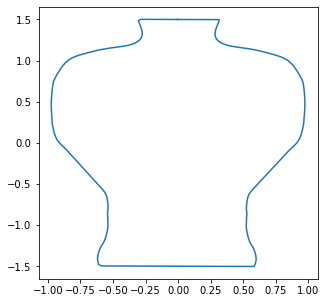

In [10]:
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(df[df['id']=='mp254']['x'],df[df['id']=='mp254']['y'])

In [119]:
x_ = list(df2[df2['id']=='mp254']['x'])
y_ = list(df2[df2['id']=='mp254']['y'])

In [8]:
pd.unique(df['id'])

array(['mp351', 'mp101', 'mp352', 'mp353', 'mp354', 'mp356', 'mp357',
       'mp386', 'mp387', 'mp388', 'mp389', 'mp390', 'mp391', 'mp392',
       'mp393', 'mp394', 'mp395', 'mp396', 'mp397', 'mp398', 'mp399',
       'mp400', 'mp401', 'mp402', 'mp403', 'mp404', 'mp405', 'mp406',
       'mp407', 'mp408', 'mp409', 'mp116', 'mp118', 'mp119', 'mp128',
       'mp130', 'mp131', 'mp132', 'mp135', 'mp146', 'mp153', 'mp154',
       'mp155', 'mp156', 'mp157', 'mp164', 'mp187', 'mp194', 'mp216',
       'mp252', 'mp265', 'mp283', 'mp370', 'mp371', 'mp373', 'mp376',
       'mp377', 'mp378', 'mp103', 'mp147', 'mp275', 'mp335', 'mp358',
       'mp359', 'mp360', 'mp361', 'mp362', 'mp363', 'mp364', 'mp365',
       'mp366', 'mp367', 'mp368', 'mp369', 'mp372', 'mp374', 'mp163',
       'mp165', 'mp173', 'mp375', 'mp379', 'mp195', 'mp108', 'mp124',
       'mp129', 'mp136', 'mp144', 'mp150', 'mp151', 'mp152', 'mp160',
       'mp178', 'mp185', 'mp186', 'mp188', 'mp191', 'mp193', 'mp204',
       'mp212', 'mp2

In [20]:
df = pd.read_csv("/home/arias1/Downloads/Leaves_Repositioned2.csv",header=None)

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-0.298901,-1.5,-0.151077,-1.467805,-0.037531,-1.365821,0.094352,-1.430738,0.255559,-1.442186,...,-0.774074,-1.402811,-0.663131,-1.463335,-0.549618,-1.500000,-0.418519,-1.498208,-0.298901,-1.500000
1,-0.314211,-1.5,-0.218206,-1.433215,-0.139793,-1.353441,-0.075839,-1.253793,-0.023513,-1.142516,...,-0.262478,-1.127314,-0.320712,-1.227431,-0.374317,-1.333361,-0.383979,-1.436232,-0.314211,-1.500000
2,-0.343490,-1.5,-0.238900,-1.446750,-0.147424,-1.360546,-0.061559,-1.258742,0.024574,-1.149368,...,-0.229391,-1.083749,-0.306309,-1.195531,-0.361686,-1.303204,-0.406440,-1.423495,-0.343490,-1.500000
3,0.041703,-1.5,0.110975,-1.420355,0.135924,-1.309865,0.182896,-1.270870,0.238861,-1.177919,...,-0.125156,-1.114669,-0.111061,-1.233570,-0.083409,-1.345471,-0.037111,-1.431843,0.041703,-1.500000
4,-0.452760,-1.5,-0.348141,-1.418461,-0.264912,-1.329461,-0.175809,-1.242895,-0.094373,-1.141614,...,-0.335015,-1.041837,-0.403325,-1.162075,-0.450946,-1.273163,-0.487379,-1.397046,-0.452760,-1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,-0.055008,-1.5,-0.023618,-1.489077,0.017703,-1.483074,0.043117,-1.457686,0.081951,-1.440760,...,-0.211943,-1.470007,-0.175016,-1.491537,-0.134715,-1.495079,-0.093842,-1.500000,-0.055008,-1.500000
436,-0.227359,-1.5,-0.189243,-1.498774,-0.159053,-1.479244,-0.121879,-1.475703,-0.085439,-1.466049,...,-0.356607,-1.446358,-0.333437,-1.477473,-0.305415,-1.493282,-0.267299,-1.492055,-0.267299,-1.492055
437,-0.117741,-1.5,-0.077914,-1.498567,-0.077914,-1.498567,-0.050814,-1.494602,-0.012411,-1.486012,...,-0.207731,-1.351635,-0.216038,-1.393399,-0.204656,-1.426579,-0.184716,-1.458611,-0.153988,-1.483435
438,0.195835,-1.5,0.241192,-1.477683,0.287993,-1.460464,0.321043,-1.428551,0.357111,-1.393389,...,0.038767,-1.488112,0.079625,-1.454934,0.111357,-1.459146,0.150479,-1.493043,0.195835,-1.500000


In [40]:
def get_ellipse(mpx, mpy, diamx, diamy,v=100):

    # Denote radius.
    a = diamx / 2  # radius on the x-axis
    b = diamy / 2  # radius on the y-axis

    # Define t.
    t = np.linspace(0, 2 * np.pi, v)

    # Compute ellipse.
    x = mpx + (a * np.cos(t))
    y = mpy + (b * np.sin(t))

    return x, y

In [97]:
exmp = list(df.iloc[-1])

In [104]:
def get_geods(p):
    exmp = list(df.iloc[p])
    x = []
    y = []

    n = len(exmp)

    for i in range(0,n):
        if i%2 == 0:
            x.append(exmp[i])
        else:
            y.append(exmp[i])
    xel,yel = get_ellipse(0,0,max(x)-min(x),max(y)-min(y),v=200)
    x1 = deepcopy(x)
    y1 = deepcopy(y)
    x2 = deepcopy(xel)
    y2 = deepcopy(yel)
    a1,b1,c1,d1 = geodDistance(x1,y1,x2,y2,k=5)
    return [x1,y1],[x2,y2],a1,b1,c1,d1

In [98]:
x = []
y = []

n = len(exmp)

for i in range(0,n):
    if i%2 == 0:
        x.append(exmp[i])
    else:
        y.append(exmp[i])

In [99]:
xorig2 = deepcopy(x)
yorig2 = deepcopy(y)

In [115]:
def reparam(x, y, npoints):
    # This function reparametrizes the curve to have npoints.

    tst = np.zeros((len(x), 2))
    tst[:, 0] = x
    tst[:, 1] = y

    p = tst
    dp = np.diff(p, axis=0)
    pts = np.zeros(len(dp) + 1)
    pts[1:] = np.cumsum(np.sqrt(np.sum(dp * dp, axis=1)))
    newpts = np.linspace(0, pts[-1], int(npoints))
    newx = np.interp(newpts, pts, p[:, 0])
    newy = np.interp(newpts, pts, p[:, 1])

    return newx, newy

In [122]:
x_,y_ = reparam(x_,y_,200)

In [123]:
xel,yel = get_ellipse(0,0,max(x_)-min(x_),max(y_)-min(y_),v=200)

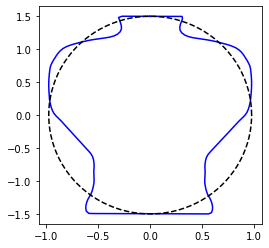

In [124]:
fig,ax = plt.subplots(figsize=(4,4))

ax.plot(x_,y_,'-b',xel,yel,'--k')

In [96]:
x1 = deepcopy(x)
y1 = deepcopy(y)
x2 = deepcopy(xel)
y2 = deepcopy(yel)
a1,b1,c1,d1 = geodDistance(x1,y1,x2,y2,k=5)

In [125]:
x1 = deepcopy(x_)
y1 = deepcopy(y_)
x2 = deepcopy(xel)
y2 = deepcopy(yel)
a3,b3,c3,d3 = geodDistance(x1,y1,x2,y2,k=5)

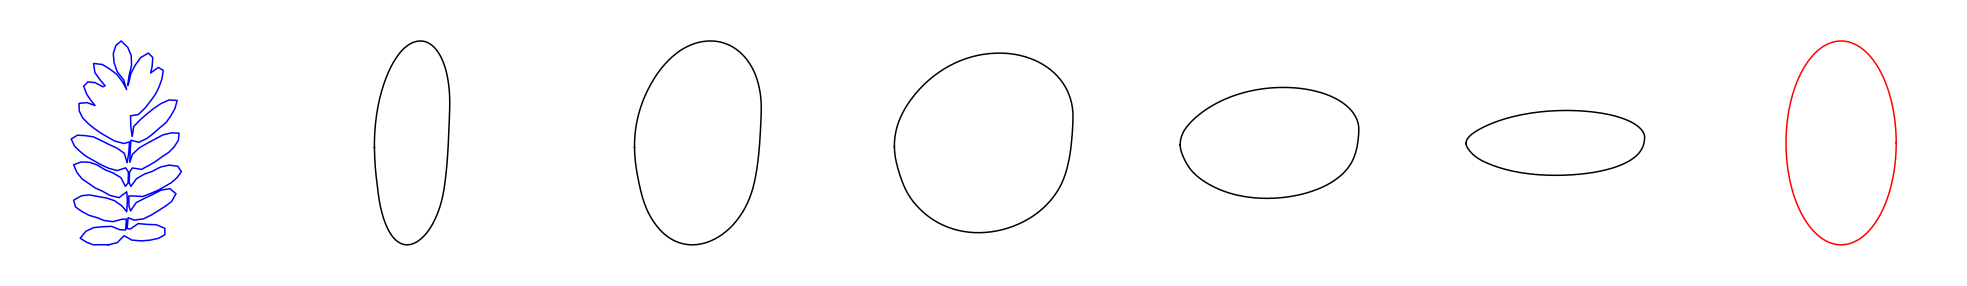

In [88]:
fig,ax = plt.subplots(1,7,figsize=(35,5))

ax[0].plot(x1,y1,'-b')
ax[-1].plot(x2,y2,'-r')

for i in range(0,5):
    
    x_,y_ = rescale(list(b1[0,:,i]),list(b1[1,:,i]),scaleDirection="both")
    
    ax[i+1].plot(x_,y_,'-k')
    
for i in range(0,7):
    ax[i].set_xlim([-2,2])
    ax[i].set_ylim([-2,2])
    ax[i].axis('off')


In [105]:
XY_1_1,XY_1_2,a1,b1,c1,d1 = get_geods(0)
XY_2_1,XY_2_2,a2,b2,c2,d2 = get_geods(-1)

Text(0.5, 1.0, 'distance = 1.38')

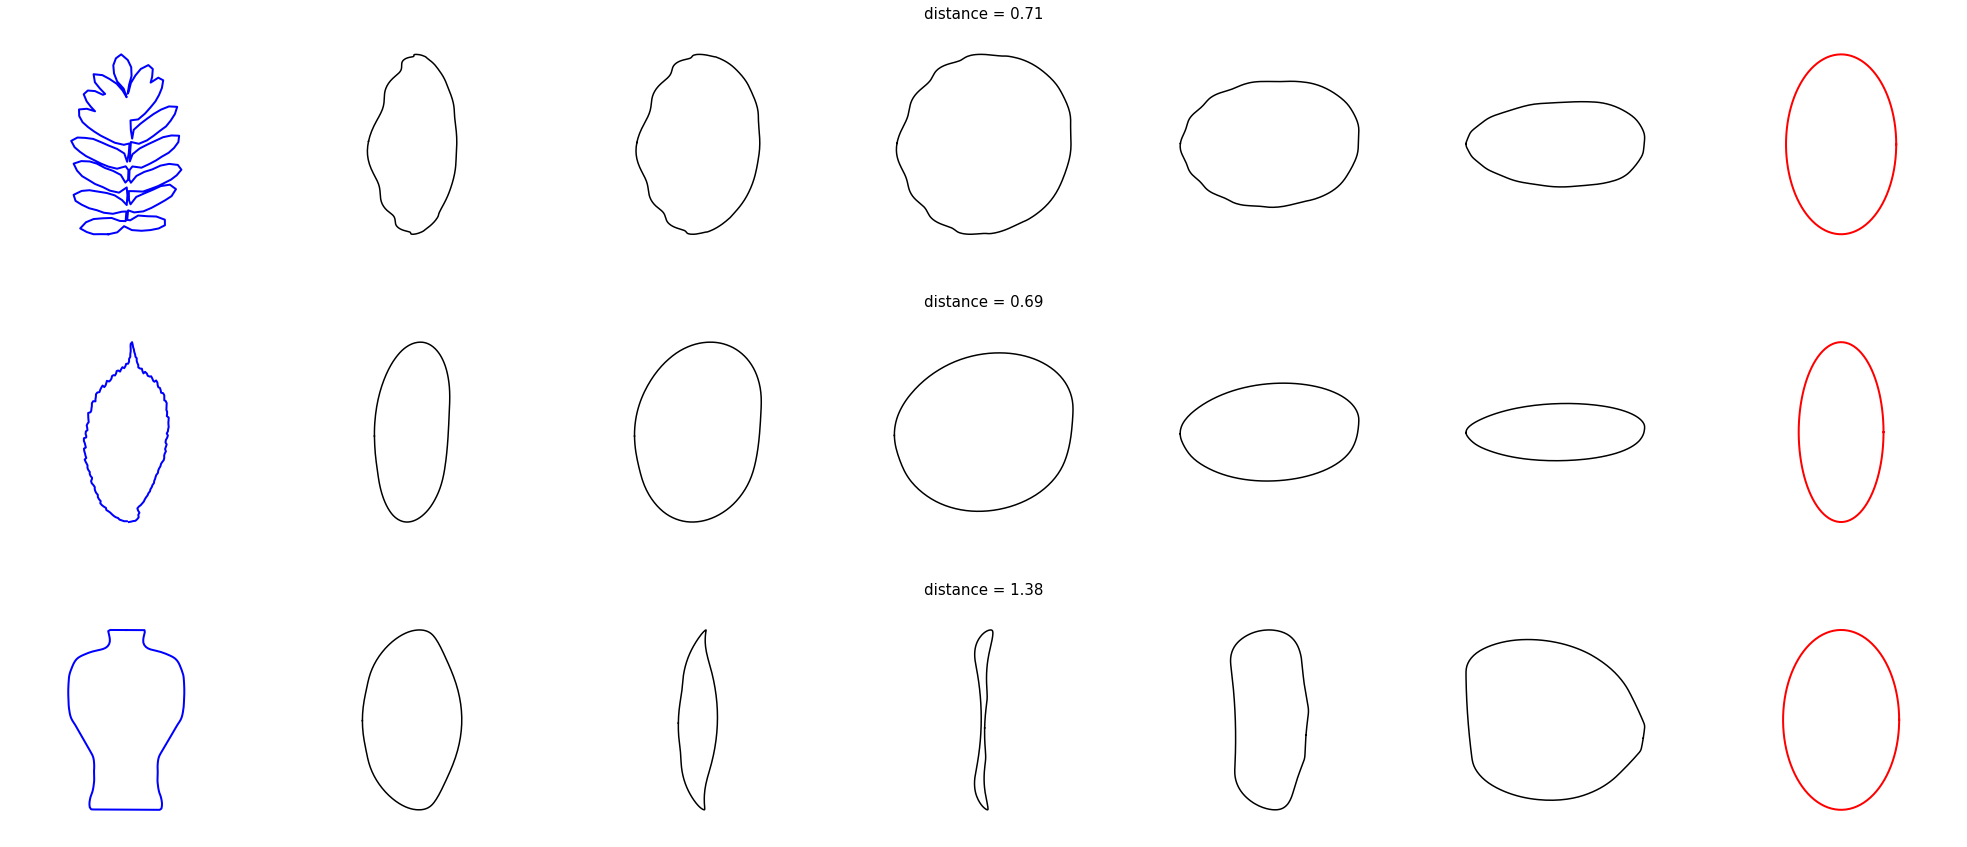

In [126]:
fig,ax = plt.subplots(3,7,figsize=(35,15))

ax[0,0].plot(XY_1_1[0],XY_1_1[1],'-b',linewidth=2)
ax[0,-1].plot(XY_1_2[0],XY_1_2[1],'-r',linewidth=2)

ax[1,0].plot(XY_2_1[0],XY_2_1[1],'-b',linewidth=2)
ax[1,-1].plot(XY_2_2[0],XY_2_2[1],'-r',linewidth=2)

ax[2,0].plot(x_,y_,'-b',linewidth=2)
ax[2,-1].plot(xel,yel,'-r',linewidth=2)

for i in range(0,5):
    
    x__,y__ = rescale(list(b1[0,:,i]),list(b1[1,:,i]),scaleDirection="both")
    ax[0,i+1].plot(x__,y__,'-k')
    
    x__,y__ = rescale(list(b2[0,:,i]),list(b2[1,:,i]),scaleDirection="both")
    ax[1,i+1].plot(x__,y__,'-k')
    
    x__,y__ = rescale(list(b3[0,:,i]),list(b3[1,:,i]),scaleDirection="both")
    ax[2,i+1].plot(x__,y__,'-k')
    
for i in range(0,7):
    for j in range(0,3):
        ax[j,i].set_xlim([-2,2])
        ax[j,i].set_ylim([-2,2])
        ax[j,i].axis('off')

ax[0,3].set_title("distance = "+str(np.round(a1,2)),fontsize=15)
ax[1,3].set_title("distance = "+str(np.round(a2,2)),fontsize=15)
ax[2,3].set_title("distance = "+str(np.round(a3,2)),fontsize=15)

In [72]:
def rescale(x, y, scaledHeightWidth=3, scaleDirection="both"):
    # This function rescales the contour so that it's between certain values (of a certain width/height)
    # and centred at (0,0). The 'scaleDirection' parameter is set to "both" as defult. This means that
    # it scales the max(height,width) to the desired width/height. The smaller side (heigh/width) will
    # then be scaled with the same scale factor, and hence lie within the desired range (and not greater).
    # If it's desired that the height will be of a certain length, or the width, then set the
    # scaleDirection paramter to "height" or "width" respectively.
    # Input: x, y coordinates, desired max height/width, and desired direction (height/width/max)
    # Output: rescaled x and y coordinates.

    if type(x) != np.ndarray:
        x = np.array(x)

    if type(y) != np.ndarray:
        y = np.array(y)

    if scaleDirection == "height":
        p = max(y) - min(y)
    elif scaleDirection == "width":
        p = max(x) - min(x)
    else:
        p = max(max(y) - min(y), max(x) - min(x))

    q = p / scaledHeightWidth

    x_ = x / q
    y_ = y / q
    mp = min(x_) + (max(x_) - min(x_)) / 2
    x_ = x_ - mp
    mp = min(y_) + (max(y_) - min(y_)) / 2
    y_ = y_ - mp

    return x_, y_
